Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


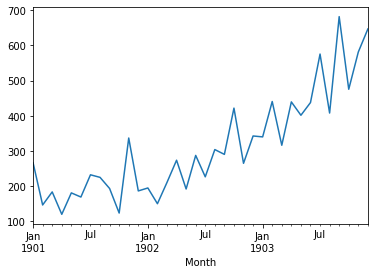

In [21]:
from pandas import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('data/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
plt.show()

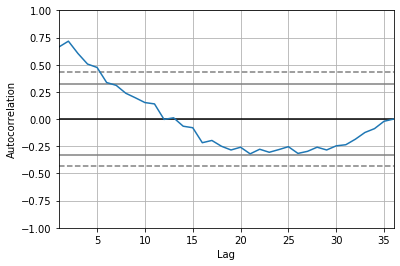

In [22]:
from pandas.plotting import autocorrelation_plot
#Autocorrelation plot for timeseries, check for randomness
autocorrelation_plot(series)
plt.show()

/home/ananya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ananya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 25 May 2020   AIC                            406.340
Time:                        12:12:16   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

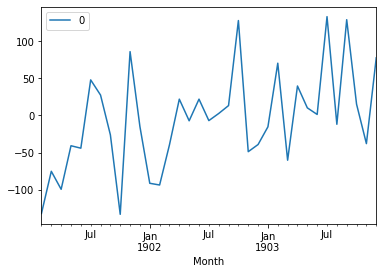

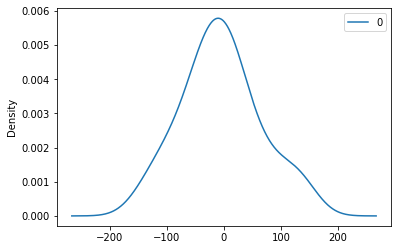

                0
count   35.000000
mean    -5.495247
std     68.132880
min   -133.296628
25%    -42.477941
50%     -7.186651
75%     24.748306
max    133.237935


In [23]:
from statsmodels.tsa.arima_model import ARIMA

#Fitting the model
model_final = ARIMA(series, order=(5,1,0))
model_fit = model_final.fit(disp=0)
print(model_fit.summary())
#Plotting residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=349.117685, expected=342.300000
predicted=306.512993, expected=339.700000
predicted=387.376385, expected=440.400000
predicted=348.154226, expected=315.900000
predicted=386.308794, expected=439.300000
predicted=356.082106, expected=401.300000
predicted=446.379478, expected=437.400000
predicted=394.737278, expected=575.500000
predicted=434.915544, expected=407.600000
predicted=507.923431, expected=682.000000
predicted=435.482808, expected=475.300000
predicted=652.743788, expected=581.300000
predicted=546.343499, expected=646.900000
Test MSE: 6958.326


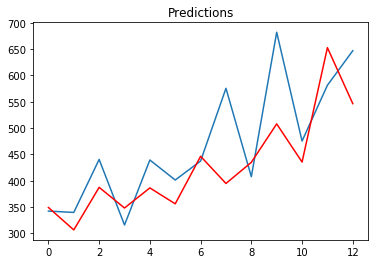

In [25]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Predictions')
plt.show()